In [1]:
pip install spotipy


In [0]:
import sys
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import spotipy.util as util

In [0]:
scope = 'user-library-read playlist-read-private'

if len(sys.argv) > 1:
  username = sys.argv[1]
else:
  print("Usage: %s username" % (sys.argv[0], ))
  sys.exit()
token = util.prompt_for_user_token(username, scope, client_id='84070371d7a0497183574178523abfcc', client_secret= '#', redirect_uri= 'http://localhost:3000/')


In [0]:
sp = spotipy.Spotify(auth=token)

In [0]:
playlist = sp.user_playlist("11156576577" , "37i9dQZEVXbLRQDuF5jeBp?si=zUtsrkt-R6mhHCf8HO6P9Q")

In [0]:
tracks = playlist["tracks"]
songs = tracks["items"]


In [0]:
while tracks['next']:
  tracks = sp.next(tracks)
  for item in tracks["items"]:
    songs.append(item)
good_ids = []

for i in range(len(songs)):
  good_ids.append(songs[i]['track']['id'])

In [0]:
features = []
for i in range(0, len(songs),50):
    audio_features = sp.audio_features(good_ids[i: i + 50])
    for track in audio_features:
      features.append(track)
      features[-1]['target'] = 1


In [0]:
#audio_features = sp.audio_features(good_ids)


In [0]:
audio_features

[{'acousticness': 0.576,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1HfMVBKM75vxSfsQ5VefZ5',
  'danceability': 0.505,
  'duration_ms': 206459,
  'energy': 0.34,
  'id': '1HfMVBKM75vxSfsQ5VefZ5',
  'instrumentalness': 0,
  'key': 4,
  'liveness': 0.21,
  'loudness': -9.005,
  'mode': 1,
  'speechiness': 0.0438,
  'target': 1,
  'tempo': 101.993,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/1HfMVBKM75vxSfsQ5VefZ5',
  'type': 'audio_features',
  'uri': 'spotify:track:1HfMVBKM75vxSfsQ5VefZ5',
  'valence': 0.0916},
 {'acousticness': 0.0546,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3eekarcy7kvN4yt5ZFzltW',
  'danceability': 0.598,
  'duration_ms': 175721,
  'energy': 0.427,
  'id': '3eekarcy7kvN4yt5ZFzltW',
  'instrumentalness': 5.83e-06,
  'key': 7,
  'liveness': 0.21,
  'loudness': -8.764,
  'mode': 0,
  'speechiness': 0.0317,
  'target': 1,
  'tempo': 76.469,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/

In [0]:
import pandas as pd


In [0]:
training = pd.DataFrame(audio_features)

In [0]:
training.head()
#training

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.505,0.340,4,-9.005,1,0.0438,0.576000,0.000000,0.2100,0.0916,101.993,audio_features,1HfMVBKM75vxSfsQ5VefZ5,spotify:track:1HfMVBKM75vxSfsQ5VefZ5,https://api.spotify.com/v1/tracks/1HfMVBKM75vx...,https://api.spotify.com/v1/audio-analysis/1HfM...,206459,4,1
1,0.598,0.427,7,-8.764,0,0.0317,0.054600,0.000006,0.2100,0.0605,76.469,audio_features,3eekarcy7kvN4yt5ZFzltW,spotify:track:3eekarcy7kvN4yt5ZFzltW,https://api.spotify.com/v1/tracks/3eekarcy7kvN...,https://api.spotify.com/v1/audio-analysis/3eek...,175721,4,1
2,0.529,0.900,1,-3.503,1,0.4180,0.000248,0.000012,0.0426,0.4340,180.291,audio_features,2QpGZOhTCHHiKmpSO9FW4h,spotify:track:2QpGZOhTCHHiKmpSO9FW4h,https://api.spotify.com/v1/tracks/2QpGZOhTCHHi...,https://api.spotify.com/v1/audio-analysis/2QpG...,104591,4,1
3,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.5530,120.042,audio_features,21jGcNKet2qwijlDFuPiPb,spotify:track:21jGcNKet2qwijlDFuPiPb,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,https://api.spotify.com/v1/audio-analysis/21jG...,215280,4,1
4,0.474,0.631,5,-5.884,0,0.3430,0.068700,0.000000,0.1320,0.4250,180.051,audio_features,6Gg1gjgKi2AK4e0qzsR7sd,spotify:track:6Gg1gjgKi2AK4e0qzsR7sd,https://api.spotify.com/v1/tracks/6Gg1gjgKi2AK...,https://api.spotify.com/v1/audio-analysis/6Gg1...,189323,4,1


In [0]:
acousticness = training['acousticness']
danceability = training['danceability']
energy = training['energy']
instrumentalness = training['instrumentalness']
liveness = training['liveness']
loudness = training['loudness']
speechiness = training['speechiness']
valence = training['valence']
tempo = training['tempo']
#training

**Acousticness** Wheather the track is acoustic or not. Range 0-1. 
0 being not acoustic at all. 1 being the most acoustic.

---

**Danceability** Describes how suitable a track is for dancing based on tempo, rhythm stability, beat strength and overall regularity. 

---
**Energy** Represents a perpetual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.  For example, death metal has high energy, while a Bach prelude scores low on the scale.

---
**Instrumentalness** Represents how much vocals a track contains. 1.0 means no vocals

---
**Liveness** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

---
**Speechiness** 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

---
**Valence** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

---
**Tempo** 	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.



In [0]:
import matplotlib.pyplot as plt
#plt.plot(acousticness)

In [0]:
#my_plot = acousticness.hist(alpha = 0.5, color = "red")
#plt.title("Acousticness Plot")

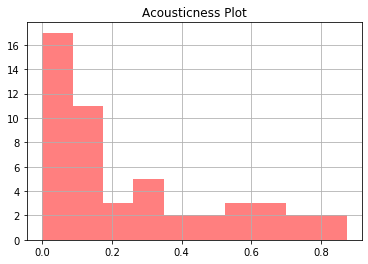

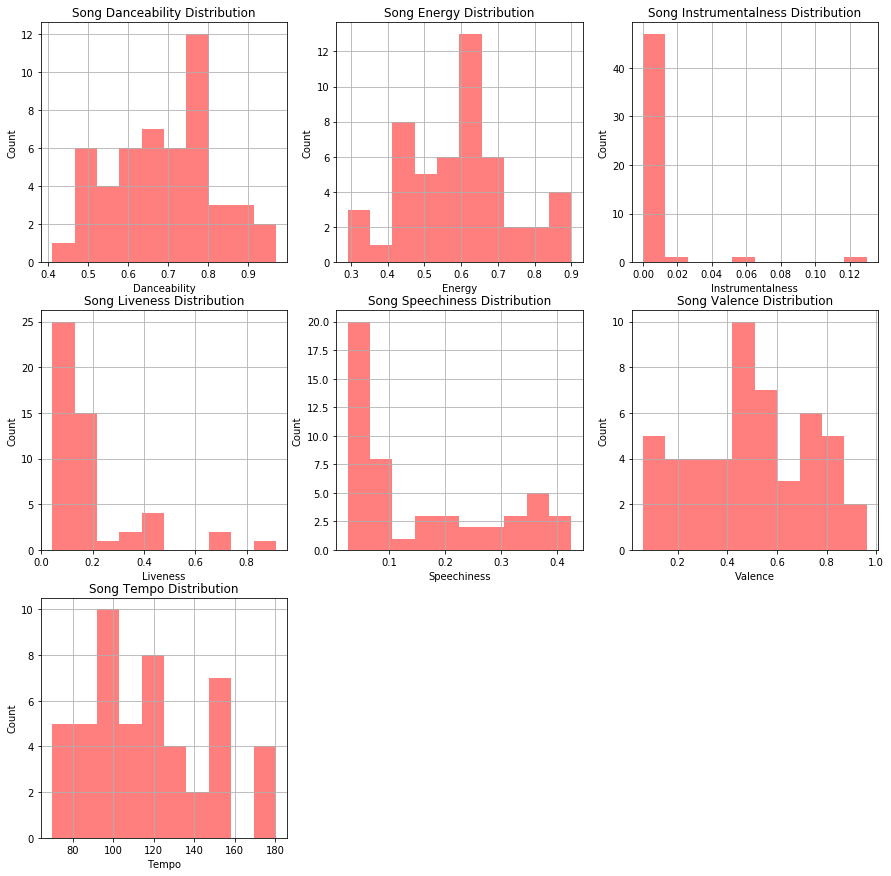

In [0]:
#Acousticness
my_plot = acousticness.hist(alpha = 0.5, color = "red")
plt.title("Acousticness Plot")
#fig = plt.figure(figsize=(15,15))
#mp_0 = fig.add_subplot(329)
#mp_0.set_xlabel("Acousticness")
#mp_0.set_ylabel("Count")
#mp_0.set_title("Song Acousticness Distribution")
#acousticness.hist(alpha = 0.5, color = "red")


#Danceability
fig = plt.figure(figsize=(15,15))
mp_1 = fig.add_subplot(331)
mp_1.set_xlabel("Danceability")
mp_1.set_ylabel("Count")
mp_1.set_title("Song Danceability Distribution")
danceability.hist(alpha = 0.5, color = "red")

#Energy
mp_2 = fig.add_subplot(332)
mp_2.set_xlabel("Energy")
mp_2.set_ylabel("Count")
mp_2.set_title("Song Energy Distribution")
energy.hist(alpha = 0.5, color = "red")

#Instrumentalness
mp_3 = fig.add_subplot(333)
mp_3.set_xlabel("Instrumentalness")
mp_3.set_ylabel("Count")
mp_3.set_title("Song Instrumentalness Distribution")
instrumentalness.hist(alpha = 0.5, color = "red")

#Liveness
mp_4 = fig.add_subplot(334)
mp_4.set_xlabel("Liveness")
mp_4.set_ylabel("Count")
mp_4.set_title("Song Liveness Distribution")
liveness.hist(alpha = 0.5, color = "red")

#Speechiness
mp_5 = fig.add_subplot(335)
mp_5.set_xlabel("Speechiness")
mp_5.set_ylabel("Count")
mp_5.set_title("Song Speechiness Distribution")
speechiness.hist(alpha = 0.5, color = "red")

#Valence
mp_6 = fig.add_subplot(336)
mp_6.set_xlabel("Valence")
mp_6.set_ylabel("Count")
mp_6.set_title("Song Valence Distribution")
valence.hist(alpha = 0.5, color = "red")

#Tempo
mp_7 = fig.add_subplot(337)
mp_7.set_xlabel("Tempo")
mp_7.set_ylabel("Count")
mp_7.set_title("Song Tempo Distribution")
tempo.hist(alpha = 0.5, color = "red")


In [0]:
from statistics import *

#mean(acousticness)
#mean(danceability)
#mean(energy)
#mean(instrumentalness)
#mean(liveness)
#mean(loudness)
#mean(speechiness)
#mean(valence)
#mean(tempo)

In [0]:
mean(energy)

0.58482

In [0]:
mean(tempo)

115.76264

In [0]:
mean(acousticness)

0.26544896